<a href="https://colab.research.google.com/github/MyatKaung/Predicting_House_Price/blob/main/Predicting_California_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download Dataset From Kaggle and Unzip Dataset

In [57]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices

mkdir: cannot create directory ‘/root/.kaggle’: File exists
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip /content/california-housing-prices.zip

Archive:  /content/california-housing-prices.zip
  inflating: housing.csv             


### Explore the Dataset

In [5]:
import pandas as pd
housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### We want to randomize the rows so we will shuffle the rows.

In [7]:
housing_pd_shuffle = housing_pd.sample(n=len(housing_pd),random_state=1)
housing_pd_shuffle.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN


#### Dummy variables are used to replace the encoded categorical variables(in our case we will look at column called 'ocean_proximity' to some numeric values(generally represented by 0 and 1). This is done so that the encoded categorical values could not have any impact on the prediction.

In [8]:
pd.get_dummies(housing_pd_shuffle['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [9]:
housing_pd_shuffle.drop('ocean_proximity',axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [14]:
housing_pd_final =pd.concat([housing_pd_shuffle.drop('ocean_proximity',axis=1),pd.get_dummies(housing_pd_shuffle['ocean_proximity'])],
                          axis=1)
housing_pd_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0


### It would be easier for me if I put the median_income column as the last column as it will be the output we want to predict.

In [15]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',	
                                     'housing_median_age',	'total_rooms',	
                                     'total_bedrooms',	'population',	
                                     'households',	'median_income',	
                                     '<1H OCEAN',	
                                     'INLAND',	'ISLAND',	
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


### Dropping Null Values

In [16]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

### Splitting into Train,Test and Validation 

In [17]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [18]:
X_train, y_train = train_pd.to_numpy()[:,:-1],train_pd.to_numpy()[:,-1]
X_val, y_val =val_pd.to_numpy()[:,:-1],val_pd.to_numpy()[:,-1]
X_test, y_test = test_pd.to_numpy()[:,:-1],test_pd.to_numpy()[:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

#### We will standardize the data so that we are going to make it into a normal distribution centered around zero then all of the values in every single column, they are on the same scale.

In [19]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:,:8])

def preprocessor(X):
  A= np.copy(X)
  A[:,:8] = scaler.transform(A[:,:8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [20]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [21]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


In [24]:
len(X_train)

18000

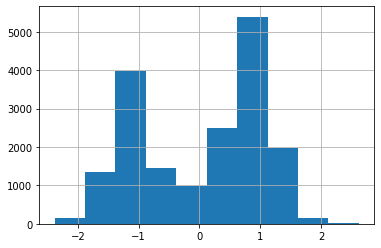

In [26]:
pd.DataFrame(X_train)[0].hist()

### Model Prediction using LinearRegression, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor and Neural Networks

#### The mean square error is the average of the square of the difference between the observed and predicted values of a variable. We will use MSE while predicting our model.

In [30]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train,y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val),y_val,squared=False) 

(68593.05578127236, 71382.43558330165)

In [34]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val),y_val,squared=False) 

(53759.09908812057, 62161.22860469906)

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val),y_val,squared=False) 

(43593.65492693277, 53432.94689003516)

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train,y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val),y_val,squared=False) 


(47274.82259072157, 51421.757975864864)

### We will create simple neural network, medium neural network and large neural network to see the differences in accuracy.

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(4,'relu'))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn',save_best_only=True)
simple_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train,validation_data=(X_val,y_val),callbacks=[cp],epochs=100)


Epoch 1/100
563/563 [==============================] - 5s 8ms/step - loss: 17607782400.0000 - root_mean_squared_error: 132694.3125 - val_loss: 5307158528.0000 - val_root_mean_squared_error: 72850.2422
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 4727808512.0000 - root_mean_squared_error: 68759.0625 - val_loss: 5076671488.0000 - val_root_mean_squared_error: 71250.7656
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 4634925568.0000 - root_mean_squared_error: 68080.2891 - val_loss: 4990161920.0000 - val_root_mean_squared_error: 70641.0781
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 4593391104.0000 - root_mean_squared_error: 67774.5625 - val_loss: 4915915776.0000 - val_root_mean_squared_error: 70113.5938
Epoch 5/100
563/563 [==============================] - 2s 3ms/step - loss: 4507415040.0000 - root_mean_squared_error: 67137.2812 - val_loss: 4846662656.0000 - val_root_mean_squared_error: 69617.9766
Epo

In [51]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train),y_train,squared =False) ,mse(simple_nn.predict(X_val),y_val,squared =False)


(63359.99066139036, 65926.536069938)

In [47]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(8, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 5s 8ms/step - loss: 7478664704.0000 - root_mean_squared_error: 86479.2734 - val_loss: 5089840640.0000 - val_root_mean_squared_error: 71343.1172
Epoch 2/100
563/563 [==============================] - 4s 7ms/step - loss: 4477529088.0000 - root_mean_squared_error: 66914.3438 - val_loss: 4873799680.0000 - val_root_mean_squared_error: 69812.6016
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 4382129152.0000 - root_mean_squared_error: 66197.6484 - val_loss: 4510196224.0000 - val_root_mean_squared_error: 67157.9922
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 4302517248.0000 - root_mean_squared_error: 65593.5703 - val_loss: 4413710848.0000 - val_root_mean_squared_error: 66435.7656
Epoch 5/100
563/563 [==============================] - 1s 3ms/step - loss: 4255736576.0000 - root_mean_squared_error: 65236.0078 - val_loss: 4440311296.0000 - val_root_mean_squared_error: 66635.6562
Epoch

In [50]:
from tensorflow.keras.models import load_model

medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train),y_train,squared =False) ,mse(medium_nn.predict(X_val),y_val,squared =False)


(49805.663483269745, 54517.79340336541)

In [52]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(16, 'relu'))
large_nn.add(Dense(8, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 4s 5ms/step - loss: 7003231232.0000 - root_mean_squared_error: 83685.3047 - val_loss: 4811028992.0000 - val_root_mean_squared_error: 69361.5781
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 4699600384.0000 - root_mean_squared_error: 68553.6328 - val_loss: 5703965184.0000 - val_root_mean_squared_error: 75524.6016
Epoch 3/100
563/563 [==============================] - 3s 4ms/step - loss: 4387107840.0000 - root_mean_squared_error: 66235.2422 - val_loss: 4277912320.0000 - val_root_mean_squared_error: 65405.7500
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 4036613632.0000 - root_mean_squared_error: 63534.3516 - val_loss: 4333513216.0000 - val_root_mean_squared_error: 65829.4219
Epoch 5/100
563/563 [==============================] - 3s 5ms/step - loss: 3989803264.0000 - root_mean_squared_error: 63164.8906 - val_loss: 3922724096.0000 - val_root_mean_squared_error: 62631.6523
Epoch

In [53]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

(48103.58722212248, 54343.225097178074)

In [54]:
from tensorflow.keras.models import load_model

medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train),y_train,squared =False) ,mse(medium_nn.predict(X_val),y_val,squared =False)

(49805.663483269745, 54517.79340336541)

In [55]:
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train),y_train,squared =False) ,mse(simple_nn.predict(X_val),y_val,squared =False)

(63359.99066139036, 65926.536069938)

#### However, from conclusion, GradientBoostingRegression is the best model compared to others in this case so we will use that model to predict the test set.

In [56]:
mse(gbr.predict(X_test), y_test, squared=False)

49290.007283127